In [2]:
import pandas as pd
import numpy as np
from modules import *
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk import word_tokenize
from konlpy.tag import Okt
from nltk.util import everygrams
import matplotlib.pyplot as plt

In [3]:
#원하는 태그 추출 & 불용어 제거
okt = Okt()

#불용어
stopwords = pd.read_csv('ko-stopwords.csv') #한국어불용어사전 불러오기
stopwords=list(stopwords['stopwords']) 
stopwords.extend(['에서','고','이다','는','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기",
                  "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다",
                  "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다",
                 '에서','고','이다','젛','뇨','껀데','뭘'
                 ]) #불용어 추가

stopwords=set(stopwords) # 중복제거    

# 형태소 분석 함수 만들기
def okt_pos_tagging2(string):
    pos_words = okt.pos(string, stem=True, norm=True) # 형태소 분석. 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag 
             in ['Noun', 'Adjective', 'Verb','Adverb'] if word not in stopwords ]

    # n_gram 만들기
    egram = list(everygrams(words, min_len=1, max_len=1))
    egram_token = [' '.join(grams) for grams in egram]

    return egram_token

def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True) # 형태소 분석. 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag 
             in ['Noun', 'Adjective', 'Verb','Adverb'] if word not in stopwords ]

    return words


In [4]:
# 불러올 csv 이름 리스트
# 전체 리뷰를 불러온후 tf-idf 분석
name_list =["느린마을","복순도가","죽향도가"]

In [5]:
position_list=['단맛','순함','독함','목넘김','탄산','선물','향','색','가성비']
'단맛|순함|독함|목넘김|탄산|선물|향|색|가성비'

word_list=['단|달|달콤','순하|순해','독해','부드|깔끔|가볍','톡|탄산|스파클링','선물','은은|향긋|과일향|누룩', '색|탁도|색깔', '가성']

In [6]:
all_data = pd.DataFrame()

for name in name_list:
    data = pd.read_csv(f"{name}.csv", encoding='utf-8-sig')
    # 전처리
    data.drop_duplicates(['text'],ignore_index=True, inplace=True) # 중복 제거
    data.columns = ['date', 'star','doc']
    data.doc = data.doc.str.replace("[^가-힣 ]"," ") # 한글만 남기고 특수문자, 숫자, 영어 삭제
    data.doc = data.doc.str.replace("\s+", " ") # white space 삭제
    data.doc = data.doc.str.replace("럽고목","럽고 목")
    data.doc = data.doc.str.replace("부 드럽","부드럽")
    data.doc = data.doc.str.replace("단","단맛")
    data.doc = data.doc.str.replace("달","단맛")
    data.doc = data.doc.str.replace("달콤","단맛")
    data.doc = data.doc.str.replace("순하","순함")
    data.doc = data.doc.str.replace("순해","순함")
    data.doc = data.doc.str.replace("독해","독함")
    data.doc = data.doc.str.replace("부드","목넘김")
    data.doc = data.doc.str.replace("깔끔","목넘김")
    data.doc = data.doc.str.replace("가볍","목넘김")
    data.doc = data.doc.str.replace("톡","탄산")
    data.doc = data.doc.str.replace("스파클링","탄산")
    data.doc = data.doc.str.replace("은은","향")
    data.doc = data.doc.str.replace("향긋","향")
    data.doc = data.doc.str.replace("과일향","향")
    data.doc = data.doc.str.replace("누룩","향")
    data.doc = data.doc.str.replace("탁도","색")
    data.doc = data.doc.str.replace("색깔","색")
    data.doc = data.doc.str.replace("가성","가성비")
    data.dropna(inplace=True)
    data.reset_index(drop=True, inplace=True)
    # globals()["감홍로 40도"] 등으로 데이터 프레임 저장됨
    globals()[f"{name}"] = data
    all_data = pd.concat([all_data,data],axis=0)


C:\Users\user\AppData\Local\Temp\ipykernel_3356\1002540113.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("[^가-힣 ]"," ") # 한글만 남기고 특수문자, 숫자, 영어 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_3356\1002540113.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("\s+", " ") # white space 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_3356\1002540113.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("[^가-힣 ]"," ") # 한글만 남기고 특수문자, 숫자, 영어 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_3356\1002540113.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("\s+", " ") # white space 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_3356\1002540113.py:8: FutureWarning: The defa

In [7]:
all_data

,date,star,doc
0,2022-11-22,5,원래도 조아래요 배송오니 너무 좋아요
1,2022-11-25,5,자주 주문해서 먹고 있습니다믿고먹는 느린마을내일을 위해 조금 남겨뒀는데남은 것도 잘...
2,2022-11-23,5,밀키스 마시는거 같아요 목넘김이 좋아서 그냥 들어가네요 금방 취합니다
3,2022-10-27,5,우유같은목넘김러움에 맛도좋고가격도좋고요즘막걸리즐겨마셔요
4,2022-10-25,5,지인분 선물로 보내드렸는데 첨 마셔본건데 너무 맛있다고 만족하셨어요 감사합니다
...,...,...,...
5674,2020-04-03,5,다양한술을 집에서 편하게 주문가능하기에 자주 주문합니다이번에도 즐겁게 마시겠읍니다
5675,2020-04-03,5,빠른 배송 감사합니당
5676,2020-03-31,5,단맛맛은 있는데 꿀 단맛맛이어서 나쁘지 않아요 기분 나쁘지 않은 단맛맛이에요 인공감...
5677,2020-03-26,5,맛이 단맛고 청량감이 좋아요


In [8]:
all_data[all_data.doc.str.contains('목넘김')]

,date,star,doc
2,2022-11-23,5,밀키스 마시는거 같아요 목넘김이 좋아서 그냥 들어가네요 금방 취합니다
3,2022-10-27,5,우유같은목넘김러움에 맛도좋고가격도좋고요즘막걸리즐겨마셔요
7,2022-11-23,5,목넘김럽고 목넘김이 좋습니다 숙취도 덜한것같구요
13,2022-11-13,5,정말 맛있고 목넘김러워요
19,2022-10-19,5,목넘김이 좋네고 맛이 참 좋네요
...,...,...,...
5658,2020-05-30,5,포장 목넘김한 계속 주문하게 되네요 세번째 구매 입니다
5667,2020-04-14,5,사이다막걸리 느낌되게 목넘김럽고 단맛단맛해서 여자들이딱 좋아할 맛이에요우연히 한 식...
5668,2020-04-14,5,먹어본 막걸리 중에 세 손가락에 꼽힙니다 정말 맛있습니다 목넘김이좋고 목넘김러우며 ...
5670,2020-04-10,5,진하고 목넘김럽고 단맛단맛하고 맛나요


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=okt_pos_tagging)
tfidf_fit = tfidf.fit(all_data.doc)


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
# 특징을 추출할 문서의 tf-idf를 구함
a = "느린마을"
bow_rep_tfidf = tfidf_fit.transform(globals()[a].doc)
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    'tf-idf': bow_rep_tfidf.sum(axis=0).flat,
    'idf': tfidf.idf_
})


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
# idf 가 높을수록 잘 안나오는 단어
# tf-idf 가 높을수록 중요한 단어
# 두값을 적절히 조정해서 특징 추출

# word_count.sort_values('tf-idf',ascending=False).head(50)[word_count['idf']>4.9][word_count['tf-idf'] * (len(all_data)/len(globals()[a]))>420]
word_count.sort_values('tf-idf',ascending=False).head(50)

,단어,tf-idf,idf
3002,맛있다,1367.048784,2.013178
7850,좋다,1184.748518,2.367851
3147,먹다,1110.712235,2.447278
2837,막걸리,1029.333418,2.390565
2933,맛,974.666346,2.389394
3764,배송,701.793705,3.088951
3287,목,644.093256,3.303932
1857,단맛,605.369825,3.036209
1504,너무,590.407859,2.911349
1699,느리다,526.739719,4.225965


In [12]:
position_list=['단맛','순함','독함','목넘김','탄산','선물','향','색','가성비']
'단맛|순함|독함|목넘김|탄산|선물|향|색|가성비'

word_list=['단|달|달콤','순하|순해','독해','부드|깔끔|가볍','톡|탄산|스파클링','선물','은은|향긋|과일향|누룩', '색|탁도|색깔', '가성']

In [13]:
word_count[word_count['단어']=='단맛']

,단어,tf-idf,idf
1857,단맛,605.369825,3.036209


<AxesSubplot: >

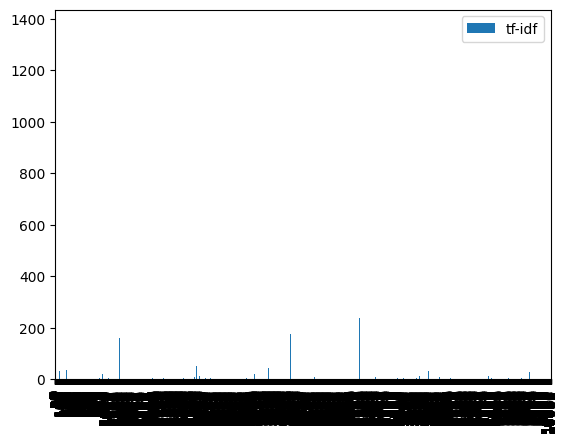

In [14]:
word_count.plot(kind='bar',y=['tf-idf'])